The main package we'll use in this unit is [***scikit-learn***](http://scikit-learn.org/dev/index.html). It has a multitude of machine learning algorithms and a tremendous amount of functionality. 

Try running the following imports and check that they all import successfully. If the scikit-learn package fails to load, try typing `pip install --user --upgrade scikit-learn` in a terminal command line.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

### Linear Regression By Hand
If a distribution is symmetric, unimodal, and bell-shaped, then we call it Normal. When a distribution is Normal, we use the mean to describe its center and its standard deviation to describe its spread. The formulas for these are:

$\bar{x} = \frac{x_1+x_2+...x_n}{n}$

$s=\sqrt{\frac{(x_1-\bar{x})^2+(x_2-\bar{x})^2+...+(x_n-\bar{x})^2}{n-1}}$

On your own time if interested, you can explore why we take the “average” by dividing by n-1 instead of n, but this is beyond the scope of the class.

### Exercise 1: 
A four person class has test scores of 80, 84, 84, 88. Calculate the mean and standard deviation by hand. 

In [11]:
#write your answers in here

Let's view the the Arizona State Tuition Data Below:

In [12]:
df = pd.read_csv('data/arizonastatetuition.csv')
df.head()

,Year,Cost
0,1990,6546
1,1991,6996
2,1992,6996
3,1993,7350
4,1994,7500


We can plot it:

Text(0, 0.5, 'Cost')

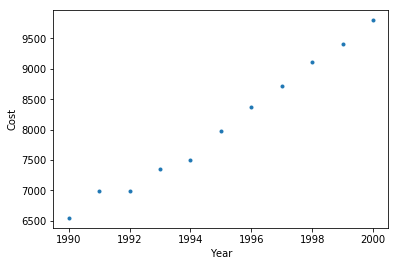

In [13]:
X = df['Year']
Y = df['Cost']
plt.plot(X, Y, '.')
plt.xlabel('Year')
plt.ylabel('Cost')

### Correlation

Correlation measures the strength of the linear association between two quantitative variables. (Thus, there can be an association between two categorical variables, but there is not a correlation unless they are quantitative).  Before you use correlation, you must check several conditions:

- Quantitative Variables Condition: Both variables must be quantitative. Variables such as gender or occupation are categorical, not quantitative.

- Straight Enough Condition: Is the form of the scatterplot straight enough that a linear relationship makes sense? 

- Outlier Condition: Outliers can distort the correlation dramatically. It can make a weak correlation look strong or vice versa. When you see an outlier, it’s often a good idea to report the correlation with and without that point.

### Exercise 2:

Which relationships could you possibly describe using correlation if the data was straight enough?

a.	Arizona state tuition over time.

b.	Hurricane prediction error over time. 

c.	The role that having a high school diploma or not plays in income level.

d.	The amount of calories that a person needs versus their weight.

e.	Lifespan versus whether or not a person was a vegetarian.

In [14]:
#insert answers here

- Correlation is always between -1 and 1. Correlation can be exactly equal to 1 or -1, but this is extremely unlikely with real data values.
- r near +1 denotes a very strong positive correlation
- r near -1 denotes a very strong negative correlation
- r near zero denotes very weak correlation

Play around with the following applet to get a sense for correlation:
	http://istics.net/stat/Correlations/

Correlation Properties:

- The sign of a correlation coefficient gives the direction of the association.

- Correlation is always between -1 and 1. Correlation can be exactly equal to 1 or -1, but this is extremely unlikely with real data values.

- Correlation treats x and y symmetrically. The correlation of x with y is the same as the correlation of y with x.

- Correlation has no units. 

- Correlation is not affected by the center or the scale of either variable (since z-scores are unaffected).

- Correlation measures the strength of the linear association between the two variables. Variables can be strongly associated but still have a small correlation if the association isn’t linear.

- Correlation is sensitive to outliers. 




### Exercise 3:
All but one of the statements below contains a mistake. Explain what the mistakes are and explain which one could be true.

A)  If the correlation between blood alcohol level and reaction time is 0.73, then the correlation between reaction time and blood alcohol level is -0.73.

B)  The correlation between height and weight is 0.568 inches per pound.

C)  The correlation between the breed of a dog and its weight is 0.435.

D)  The correlation between weight and length of foot is 0.488.

E)  The correlation between gender and age is -0.171. 


In [15]:
#insert answers here

### Correlation Does Not Imply Causation
Whenever we have a strong correlation, it’s tempting to try to explain it by imagining that the predictor variable has caused the response to change. Don’t do it!

Example: A scatterplot of damage in dollars caused to a house by fire would show a strong correlation with the number of firefighters at the scene. Does that mean that firefighters cause the damage? No! There is a lurking variable – the size of the blaze! Scatterplots and correlation coefficients NEVER prove causation. 

### Exercise 4:
A study by a prominent psychologist found a moderately strong positive association between the number of hours of sleep a person gets and the personʹs ability to memorize information. 

a. Explain in the context of this problem what ʺpositive associationʺ means.


b. Hoping to improve academic performance, the psychologist recommended 	the school board allow students to take a nap prior to any assessment. Discuss this reasoning.


In [16]:
#insert answer here

Going back to the Arizona State tuition example, we can find the correlation coefficient, r, by typing:

In [17]:
pearsonr(X, Y)[0]

0.9931587162920171

We can actually use the built-in capabilities of pandas to view correlation coefficients as well. Obviously, the correlation between a variable and itself is 1:

In [18]:
df.corr()

,Year,Cost
Year,1.000000,0.993159
Cost,0.993159,1.000000


### Linear Regression 
The line of best fit is given by the equations
$\hat{y} = b + mx$, where
$ b_1= r (\frac{s_y}{s_x})$
and 
$m = \bar{y} - b_1 \bar{x}$. 

To find the means and standard deviations, we can type:

In [19]:
print(f"X mean: {X.mean()}, Y mean: {Y.mean()}")
print(f"X std: {X.std()}, Y std: {Y.std()}")

X mean: 1995.0, Y mean: 8070.363636363636
X std: 3.3166247903554, Y std: 1088.940794784296


### Exercise 5:
Calculate the line of best fit by hand for the Arizona State tuition example by using the mean and standard deviation values above.

In [20]:
#insert exercise 5 answers

We can also obtain the line of best fit using the scikit-learn package:

In [21]:
# Create an empty model
model = LinearRegression()
# Choose the response variable, which in this case is y
y = df['Cost']
# Choose the predictor variable, which in this case is X:
X=df.drop('Cost', axis=1)
# Fit the model to the full dataset
model.fit(X, y)
# print out intercept
print('b: ', model.intercept_)
# print out other coefficients
print('m: ', model.coef_)

b:  -642462.8636363638
m:  [326.08181818]


Note that a mean of $\bar{Y}=326$ indicates that for each increase in year, the tuition is expected to rise by 326 dollars. A y-intercept of -642,462 indicates that in the year 0 A.D., we predict tuition to cost -642,462. Obviously, this does not make sense, as we extrapolated too far from the given range of x-values 1990-2000. Often, the y-intercept may not make much sense in context, but the slope should.

If we wanted to plot the regression line manually, we could type:

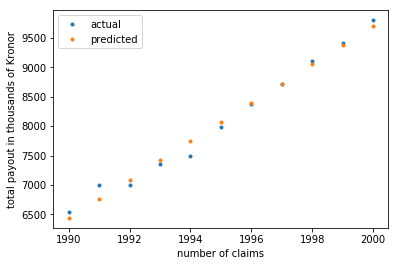

In [22]:
b = model.intercept_
m = model.coef_[0]
plt.plot(X,y,'.', label='actual')
plt.plot(X, m*X+b, '.', label='predicted')
plt.xlabel('number of claims')
plt.ylabel('total payout in thousands of Kronor')
plt.legend()

But luckily, we can use the predict method built in:

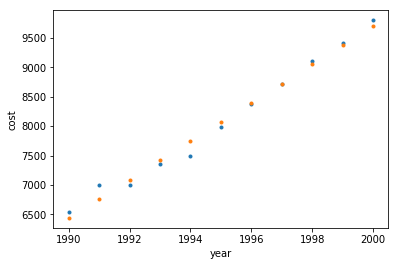

In [23]:
plt.plot(X,y,'.', X, model.predict(X), '.');
plt.xlabel('year');
plt.ylabel('cost');

If you prefer the line of best fit to be a line instead of dots, get rid of the period:

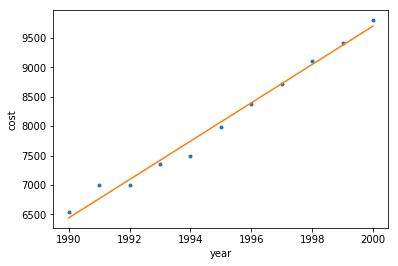

In [24]:
plt.plot(X,y,'.', X, model.predict(X));
plt.xlabel('year');
plt.ylabel('cost');

What would we predict tuition to be in 2020?

In [25]:
model.predict([[2020]])

array([16222.40909091])

### sklearn: What's in a model?

Woohoo! You just used your first scikit-learn model, LinearRegression. Essentially all models in `sklearn` inherit from the same type of "estimator" interface.  This means they'll share common methods that we'll see over and over again like:
- `fit()`: Fit a model to a set of training data
- `score()`: Score the performance of a model on a given sample of data with known ground truth dependent variables
- `predict()`: Predict target/response variables based on a sample of independent variables (features, predictors, etc)

Additionally, models are usually loaded with other goodies once they've been fit, which can provide information about the resulting fitted model.  For instance, the ones we printed out above were:
- `intercept_`: our $\beta_0$ (intercept b in our regression model)
- `coef_`: the other $\beta$s (slope m in our model)

### R-squared
There is one more important idea to note besides slope and intercept. The correlation coefficient squared gives us an important value. Since $R=0.993$ in our Arizona State model, we have that $R^2=0.986$.  Without going into details, we will note that this gives us the fraction of the data’s variation that is accounted for in our model. 

For example, since our $R^2$ is approximately 98.6%, this means that 98.6% of the variation in tuition is accounted for by year. The other 1.4% might have something to do with economic indicators, state budget, or other factors. Since 98.6% is a very high percentage, we say that our model has good predictive power.

As another example consider the graph below that shows hurricanes between 1970 and 2006 and the prediction error in nautical miles of the predicted position.
![title](images/hurricanes.png)

Suppose that the correlation coefficient for this model is $R=0.879$. Thus, $R^2=0.773$. Therefore, 77.3% of the variation in prediction error can be accounted for by year. Other factors, such as temperature and whether the storm lands over water or land, may explain some of the remaining variation. 

### Exercise 6:
The correlation coefficient, R, for protein (x) versus fat (y) for various Burger King items is given by $R=0.83.

a. Calculate R-Squared and describe what it tells you.

b. What other factors might be affecting fat content?

In [ ]:
#insert exercise 6

### Residuals
A residual is given by the difference between the actual and predicted values, $y-
\hat{y}$.

For example, in the year 1990, since the actual tuition was 6546 dollars and the predicted tuition was 6440 dollars, the residual is +107 dollars. As a consumer, you would probably prefer to pay tuition during years when the residuals were negative, as that would indicate that you paid less than predicted by a linear model.

### Exercise 7
Suppose that you have a linear model for your class that compares the amount of sugar consumed daily versus the number of tooth cavities. Would you prefer to have a positive or negative residual. Why?

In [ ]:
#insert answer

### Residual Plot
A residual plot is the scatterplot of the residuals $y-
\hat{y}$ against the explanatory variable x. 

Recall that calculating the least squares line required the quantitative variables, straight enough, and outliers conditions were satisfied. However, there is one more condition that we really need to check:

Does the Plot Thicken Condition: A scatterplot of the residuals versus the x-values should have no direction or shape. It should just be a blob of points. 

Recall the Arizona State Tuition scatterplot from above. This plot clearly satisfies the quantitative variables, straight enough, and outlier conditions. So a linear model should be appropriate, right?

Well, let’s take a look at the residual plot: 

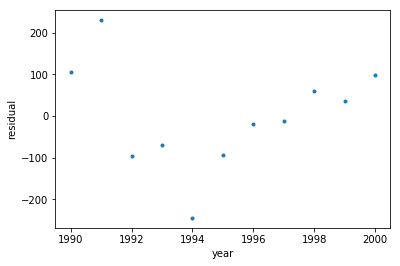

In [39]:
plt.plot(X,y - model.predict(X), '.');
plt.xlabel('year');
plt.ylabel('residual');

There seems to be a clear down-up pattern here, instead of a shapeless blob, and so we conclude that a linear model might not actually be appropriate!

### Exercise 8:
Let’s explore why certain shapes in the residual pattern are bad.  If your residual pattern has the shapes below, what might be wrong with using a linear model?
![title](images/residuals.png)

In [ ]:
#insert exercise 8